In [3]:
# Predictive Maintenance for HVAC Systems using Energy Efficiency Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
df = pd.read_excel(url)

In [6]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [7]:
# Rename columns for easier access
df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
              'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 
              'Heating_Load', 'Cooling_Load']

In [8]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Feature Descriptions
 1. Relative_Compactness: The ratio of the building's volume to its surface area. A higher value indicates a more compact design, which may affect energy efficiency.
 2. Surface_Area: The total exterior surface area of the building. Larger surface areas may lead to higher energy losses.
 3. Wall_Area: The total area of the building's walls. Similar to surface area, larger wall areas can lead to higher energy losses.
 4. Roof_Area: The area of the building's roof. This feature may impact the building's energy efficiency based on its insulation and exposure to sunlight.
 5. Overall_Height: The height of the building from the ground to the roof. Taller buildings may have different energy efficiency characteristics.
 6. Orientation: The direction the building faces, which can influence the amount of sunlight it receives and thus its heating and cooling needs.
 7. Glazing_Area: The total area of windows in the building. More windows can lead to higher heat loss in winter and higher heat gain in summer.
 8. Glazing_Area_Distribution: The distribution of window area across different sides of the building. This can impact how sunlight enters the building and affects energy efficiency.
 9. Heating_Load: The amount of energy needed to heat the building, measured in kWh/m². This is one of the target variables for predictive modeling.
 10. Cooling_Load: The amount of energy needed to cool the building, measured in kWh/m². This is the other target variable for predictive modeling.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [11]:
# Data Preprocessing
# Handling missing values (if any)
df = df.dropna()

In [12]:
# Features and target
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y = df['Cooling_Load']


In [13]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

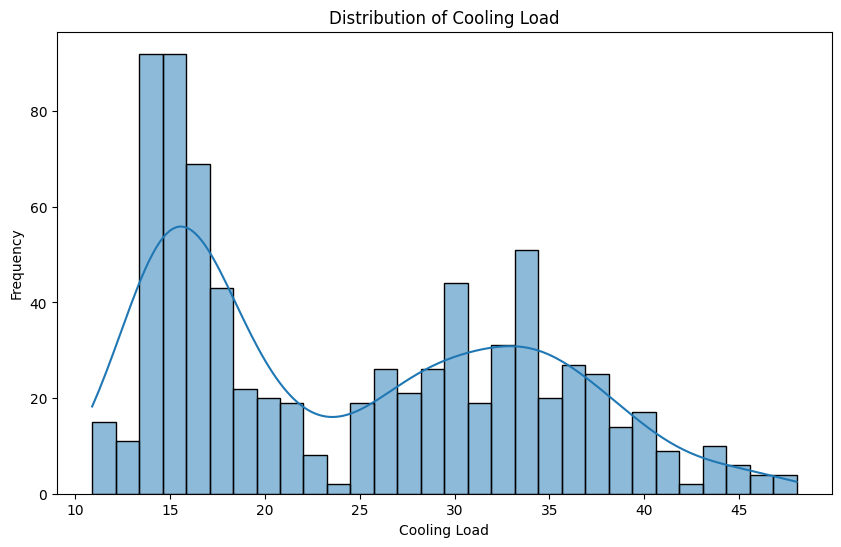

In [14]:
# Exploratory Data Analysis (EDA)
# Plot target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Cooling Load')
plt.xlabel('Cooling Load')
plt.ylabel('Frequency')
plt.show()

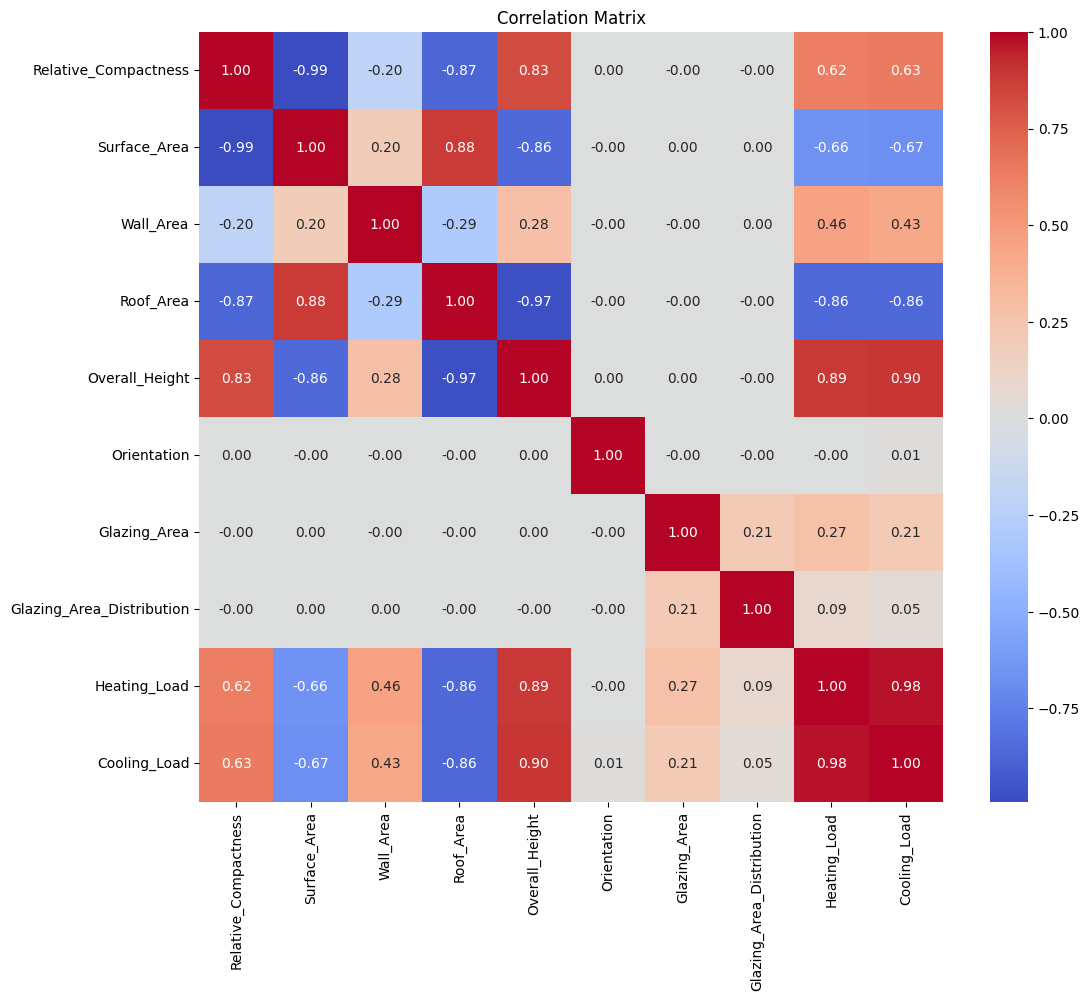

In [15]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Feature Engineering
# Creating new features (example: interaction terms)
df['Compactness_Surface_Area'] = df['Relative_Compactness'] * df['Surface_Area']

In [17]:
# Select important features
important_features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Overall_Height', 'Glazing_Area']
X = df[important_features]
X_scaled = scaler.fit_transform(X)

In [18]:
# Model Building
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [20]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'{name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}')

Linear Regression - MAE: 2.20, RMSE: 3.16
Random Forest - MAE: 1.17, RMSE: 1.75
Gradient Boosting - MAE: 1.16, RMSE: 1.74


In [21]:
# Hyperparameter tuning using GridSearchCV (example for Random Forest)
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None, 10, 20,30]
}

In [22]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [23]:
# Evaluate best model
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Best Random Forest - MAE: {mae:.2f}, RMSE: {rmse:.2f}')

Best Random Forest - MAE: 1.17, RMSE: 1.75
